# Scientific application of Cellular Automata

A cellular automaton is a discrete model of computation studied in automata theory. A cellular automaton consists of a regular grid of cells, each in one of a finite number of states. The grid can be in any finite number of dimensions. For each cell, a set of cells called its neighborhood is defined relative to the specified cell. An initial state (time t = 0) is selected by assigning a state for each cell. A new generation is created (advancing t by 1), according to some fixed rule that determines the new state of each cell in terms of the current state of the cell and the states of the cells in its neighborhood.

In [1]:
%matplotlib notebook

In [2]:
# Those are basically the libraries we need
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colors
from matplotlib.colors import ListedColormap
import numpy as np
import math

# This is a library made specifically for cellular automata and will make the visulisation of classic CAs an easy task 
import cellpylib as cpl

## Wolfram Code

Wolfram code is a naming system often used for one-dimensional cellular automaton rules, introduced by Stephen Wolfram in a 1983 paper and used in his book A New Kind of Science.

This cellular automata has some resemblance with some natural patterns like the patterns on some seashells.

the final pattern here will vary depending on the "ruleset" which is a number representing the next state of a cell for each possible neiborhood of it.

<IPython.core.display.Javascript object>


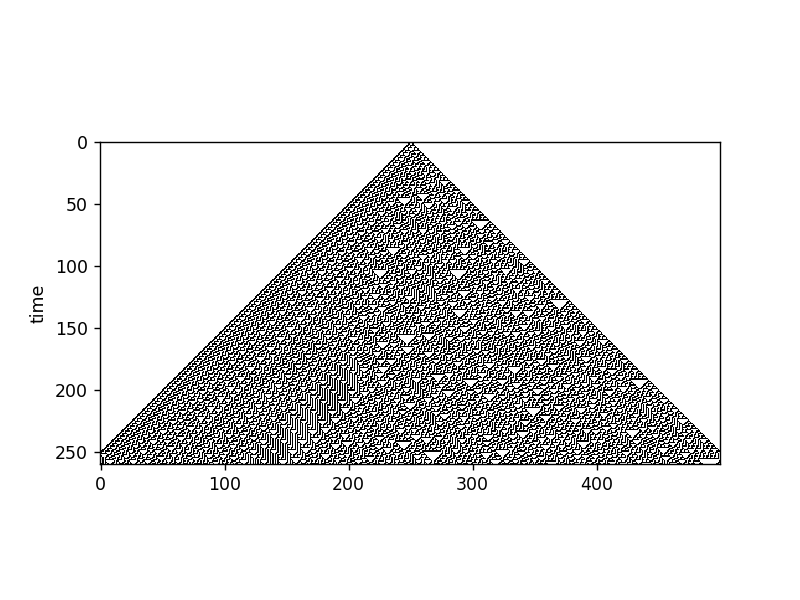

In [4]:
cellular_automaton = cpl.init_simple(500)

# the last number sugnifies the ruleset ,you can modify the it to get different patterns, 
# this number must be between 0 and 256 
cellular_automaton = cpl.evolve(cellular_automaton, timesteps=260, memoize=True, apply_rule=lambda n, c, t: 
                                cpl.nks_rule(n, 30))
cpl.plot(cellular_automaton)

## Sandpiles

The Abelian sandpile model (ASM) is the more popular name of the original Bak–Tang–Wiesenfeld model (BTW). BTW model was the first discovered example of a dynamical system displaying self-organized criticality. It was introduced by Per Bak, Chao Tang and Kurt Wiesenfeld in a 1987 paper.

The model is a cellular automaton. In its original formulation, each site on a finite grid has an associated value that corresponds to the slope of the pile. This slope builds up as "grains of sand" are randomly placed onto the pile, until the slope exceeds a specific threshold value at which time that site collapses transferring sand into the adjacent sites, increasing their slope.

This topic has a great interest in the field of mathematics, and the calculation of the identity matrix of an big grid will give some beautiful fractal-like patterns.

<IPython.core.display.Javascript object>


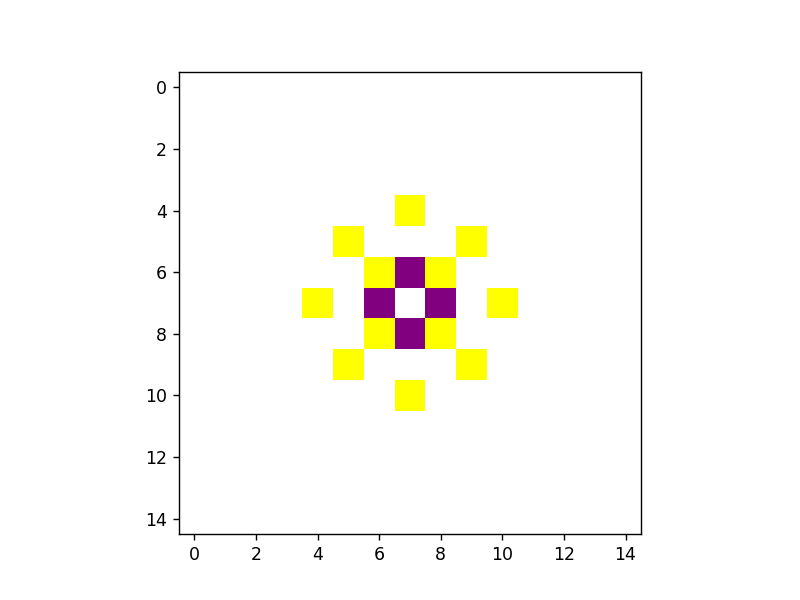

In [5]:
n = 15
sandpile = cpl.Sandpile(n, n)
ca = cpl.init_simple2d(n, n, val=5)

for i in range(300):
    ca[-1, n//2, n//2] += 1
    ca = cpl.evolve2d(ca, apply_rule=sandpile, timesteps=cpl.until_fixed_point(), neighbourhood='von Neumann')

cpl.plot2d_animate(ca, colormap=ListedColormap(["white", "yellow", "purple", "red"]))

## Langton's loop

Langton's loops are a particular "species" of artificial life in a cellular automaton created in 1984 by Christopher Langton. They consist of a loop of cells containing genetic information, which flows continuously around the loop and out along an "arm", which will become the daughter loop. The "genes" instruct it to make three left turns, completing the loop, which then disconnects from its parent.

<IPython.core.display.Javascript object>


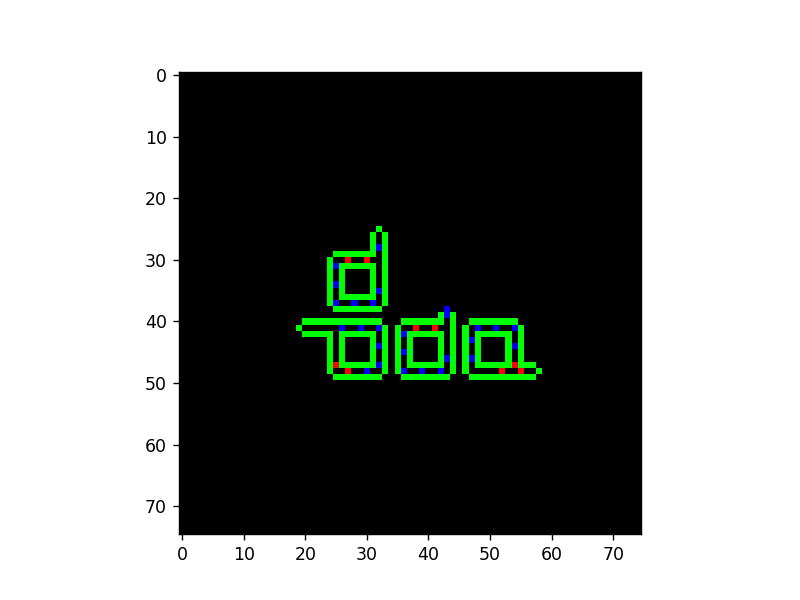

In [6]:
langtons_loop = cpl.LangtonsLoop()

# the initial conditions consist of a single loop
cellular_automaton = langtons_loop.init_loops(1, (75, 75), [40], [25])

cellular_automaton = cpl.evolve2d(cellular_automaton, timesteps=500, apply_rule=langtons_loop, memoize="recursive")

cpl.plot2d_animate(cellular_automaton, colormap=ListedColormap(["black", "lime", "red", "blue"]))

## Langton's Ant

Langton's ant is a two-dimensional universal Turing machine with a very simple set of rules but complex emergent behavior. It was invented by Chris Langton in 1986 and runs on a square lattice of black and white cells. The universality of Langton's ant was proven in 2000. The idea has been generalized in several different ways, such as turmites which add more colors and more states.

Squares on a plane are colored variously either black or white. We arbitrarily identify one square as the "ant". The ant can travel in any of the four cardinal directions at each step it takes. The "ant" moves according to the rules below:
  -At a white square, turn 90° clockwise, flip the color of the square, move forward one unit
  -At a black square, turn 90° counter-clockwise, flip the color of the square, move forward one unit

Langton's ant can also be described as a cellular automaton, where the grid is colored black or white and the "ant" square has one of eight different colors assigned to encode the combination of black/white state and the current direction of motion of the ant

<IPython.core.display.Javascript object>


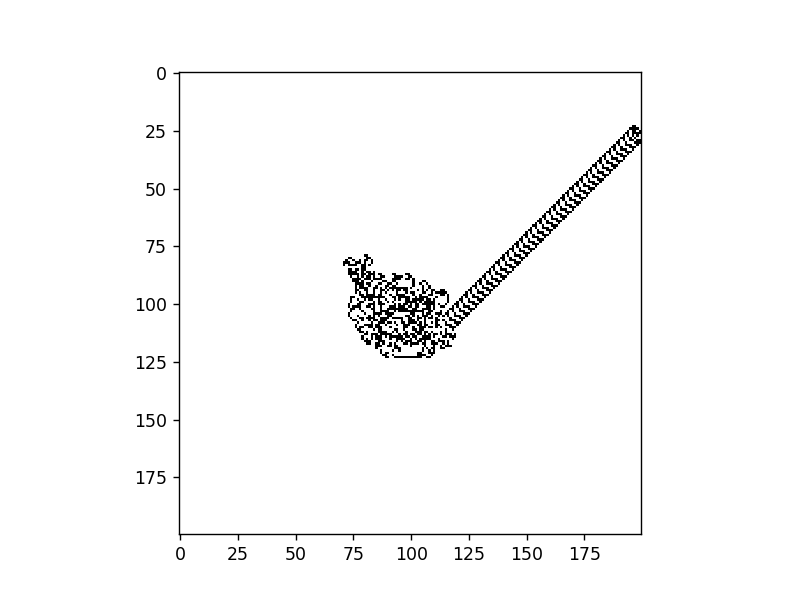

In [7]:
dim = 200
a = np.matrix(np.zeros((dim, dim)))
pos = np.matrix([[dim // 2], [dim // 2]])  # current position of ant
direction = np.matrix([[1], [0]])  # direction ant is currently moving

# Rotation Matrices
clock = np.matrix([[0, 1], [-1, 0]])
counter = np.matrix([[0, -1], [1, 0]])


def takestep(a, pos, direction, steps = 25):
    for i in range(steps):
        pos[:] = pos + direction
        if a[pos[0, 0], pos[1, 0]] == 0:  # landed on white
            a[pos[0, 0], pos[1, 0]] = 1
            direction[:] = clock * direction
        else:
            a[pos[0, 0], pos[1, 0]] = 0
            direction[:] = counter * direction

fig = plt.figure()
im = plt.imshow(a, interpolation='none', vmin=0, vmax=1, cmap=plt.get_cmap("Greys"))

def animate(i):
    takestep(a, pos, direction)
    im.set_data(a)
    return [im]


anim = animation.FuncAnimation(fig, animate,  interval=-1, blit=True, repeat=False)
plt.show()

## Forest Fire Simulation

A simple model of a forest fire is defined as a two-dimensional cellular automaton on a grid of cells which take one of three states: empty, occupied by a tree, or burning. The automaton evolves according to the following rules which are executed simultaneously for every cell at a given generation.

   1-A burning cell turns into an empty cell.

   2-A cell occupied by a tree becomes a burning cell if any of its eight neighbouring cells are burning.

   3-A cell occupied by a tree becomes burning with a probabilty f (even if none of its neighbouring cells are burning), as      though struck by lightning.
 
An empty cell becomes occupied by a tree with probability p

<IPython.core.display.Javascript object>


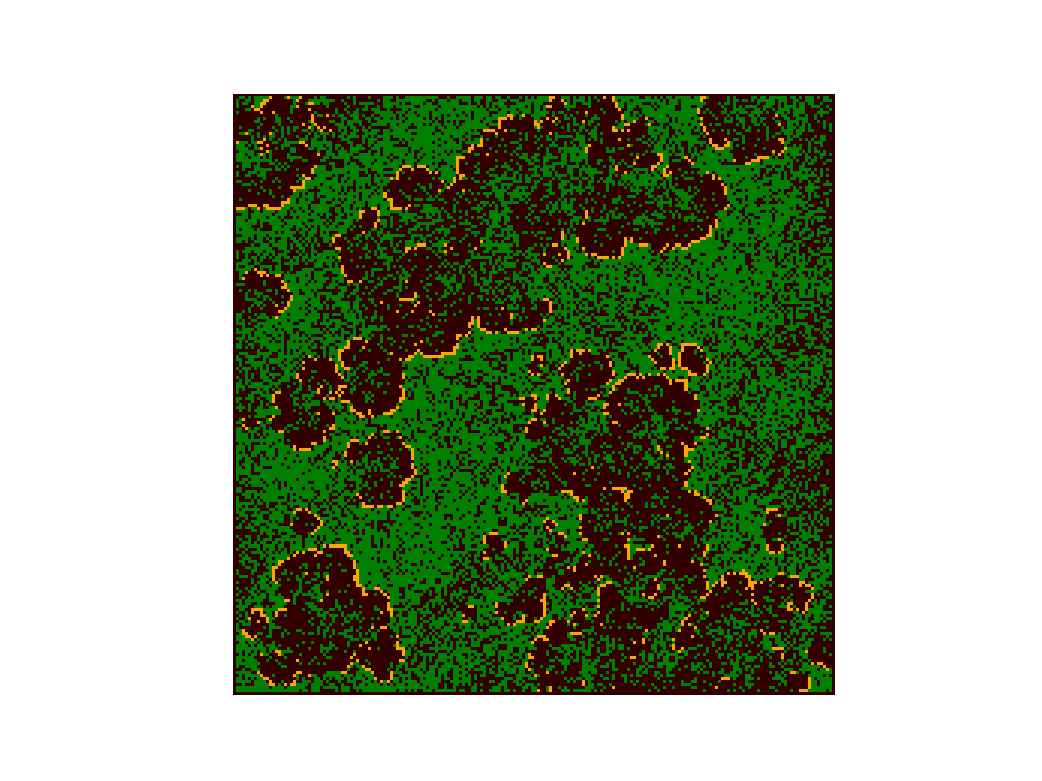

In [8]:
neighbourhood = ((-1,-1), (-1,0), (-1,1), (0,-1), (0, 1), (1,-1), (1,0), (1,1))
EMPTY, TREE, FIRE = 0, 1, 2
# Colours for visualization: brown for EMPTY, dark green for TREE and orange for FIRE.
# Note that for the colormap to work, this list and the bounds list
# must be one larger than the number of different values in the array.
colors_list = [(0.2,0,0), (0,0.5,0), (1,0,0), 'orange']
cmap = colors.ListedColormap(colors_list)
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)

def iterate(X):
    """Iterate the forest according to the forest-fire rules."""

    # The boundary of the forest is always empty, so only consider cells
    # indexed from 1 to nx-2, 1 to ny-2
    X1 = np.zeros((ny, nx))
    for ix in range(1,nx-1):
        for iy in range(1,ny-1):
            if X[iy,ix] == EMPTY and np.random.random() <= p:
                X1[iy,ix] = TREE
            if X[iy,ix] == TREE:
                X1[iy,ix] = TREE
                for dx,dy in neighbourhood:
                    # The diagonally-adjacent trees are further away, so
                    # only catch fire with a reduced probability:
                    if abs(dx) == abs(dy) and np.random.random() < 0.573:
                        continue
                    if X[iy+dy,ix+dx] == FIRE:
                        X1[iy,ix] = FIRE
                        break
                else:
                    if np.random.random() <= f:
                        X1[iy,ix] = FIRE
    return X1

# The initial fraction of the forest occupied by trees.
forest_fraction = 0.2
# Probability of new tree growth per empty cell, and of lightning strike.
p, f = 0.05, 0.0001
# Forest size (number of cells in x and y directions).
nx, ny = 200, 200
# Initialize the forest grid.
X  = np.zeros((ny, nx))
X[1:ny-1, 1:nx-1] = np.random.randint(0, 2, size=(ny-2, nx-2))
X[1:ny-1, 1:nx-1] = np.random.random(size=(ny-2, nx-2)) < forest_fraction

fig = plt.figure(figsize=(25/3, 6.25))
ax = fig.add_subplot(111)
ax.set_axis_off()
im = ax.imshow(X, cmap=cmap, norm=norm)#, interpolation='nearest')

# The animation function: called to produce a frame for each generation.
def animate(i):
    im.set_data(animate.X)
    animate.X = iterate(animate.X)
# Bind our grid to the identifier X in the animate function's namespace.
animate.X = X

# Interval between frames (ms).
interval = 100
anim = animation.FuncAnimation(fig, animate, interval=interval, frames=200)
plt.show()

## Belousov–Zhabotinsky reaction

Now we come to an example of the applications of CA in chemistry.

A Belousov–Zhabotinsky reaction, or BZ reaction, is one of a class of reactions that serve as a classical example of non-equilibrium thermodynamics, resulting in the establishment of a nonlinear chemical oscillator.

A number of BZ cocktails are available in the chemical literature and on the web. Ferroin, a complex of phenanthroline and iron, is a common indicator. These reactions, if carried out in petri dishes, result in the formation first of colored spots. These spots grow into a series of expanding concentric rings or perhaps expanding spirals similar to the patterns generated by a cyclic cellular automaton.

<IPython.core.display.Javascript object>


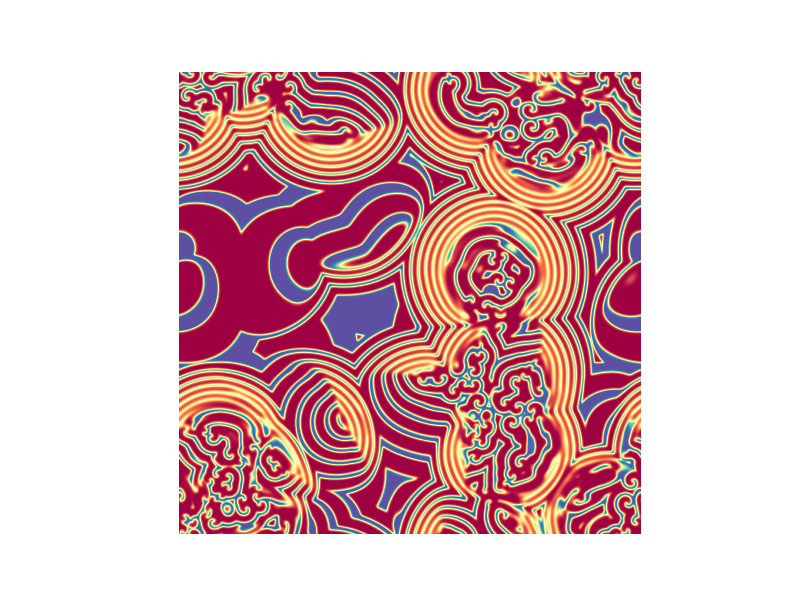

In [9]:
nx, ny = 600, 600
alpha, beta, gamma = 1.2, 1, 1

def update(p,arr):
    """Update arr[p] to arr[q] by evolving in time."""
    
    q = (p+1) % 2
    s = np.zeros((3, ny,nx))
    m = np.ones((3,3)) / 9
    for k in range(3):
        s[k] = convolve2d(arr[p,k], m, mode='same', boundary='wrap')
    # Apply the reaction equations
    arr[q,0] = s[0] + s[0]*(alpha*s[1] - gamma*s[2])
    arr[q,1] = s[1] + s[1]*(beta*s[2] - alpha*s[0])
    arr[q,2] = s[2] + s[2]*(gamma*s[0] - beta*s[1])
    # Ensure the species concentrations are kept within [0,1].
    np.clip(arr[q], 0, 1, arr[q])
    return arr

arr = np.random.random(size=(2, 3, ny, nx))

fig, ax = plt.subplots()
im = ax.imshow(arr[0,0], cmap=plt.cm.Spectral)
ax.axis('off')

def animate(i, arr):
    """Update the image for iteration i of the Matplotlib animation."""

    arr = update(i % 2, arr)
    im.set_array(arr[i % 2, 0])
    return [im]

anim = animation.FuncAnimation(fig, animate, frames=200, interval=50, blit=False, fargs=(arr,))

plt.show()

## Smooth Life

We finally present you "Smooth life", arguably the most advanced and beautiful CA we have seen so far.

Chances are you’ve seen Conway’s Game of Life, the checkerboard cellular automaton featuring stable structures, replicators, and all sorts of cool designs.

It’s called “life” because the processes of movement and evolution bear some tangential resemblance to regular organic life, although there are plenty of other reasons to be interested.

Now John Baez points us to a version called SmoothLife, in which the evolution looks dramatically more “biological”. Rather than just looking at the nearest neighbor sites on a square grid, SmoothLife integrates over a region in the vicinity of each point, with a specified filter function. As a result, everything looks, well, a lot smoother.

<IPython.core.display.Javascript object>


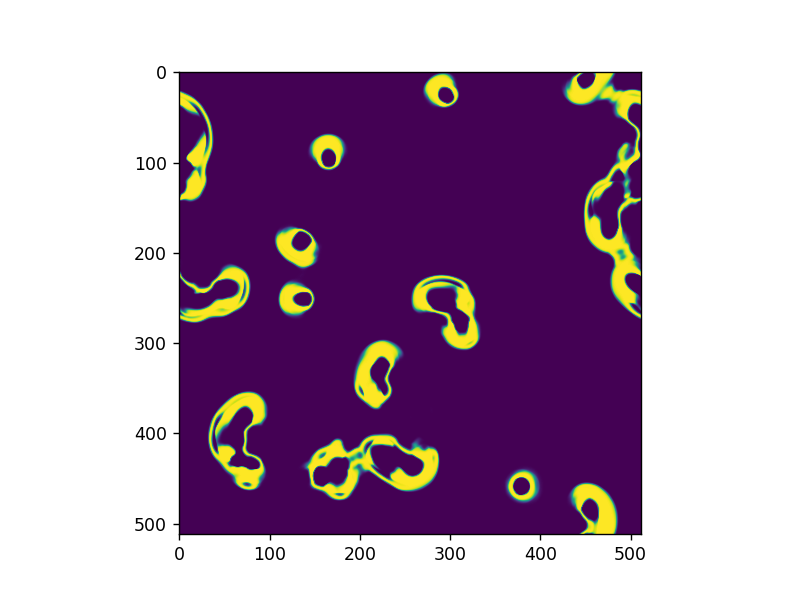

In [10]:
class Rules:
    # Birth range
    B1 = 0.278
    B2 = 0.365
    # Survival range
    D1 = 0.267
    D2 = 0.445
    # Sigmoid widths
    N = 0.028
    M = 0.147


    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)  # Set variables from constructor

    @staticmethod
    def sigma(x, a, alpha):
        """Logistic function on x
        Transition around a with steepness alpha
        """
        return 1.0 / (1.0 + np.exp(-4.0 / alpha * (x - a)))

    def sigma2(self, x, a, b):
        """Logistic function on x between a and b"""
        return self.sigma(x, a, self.N) * (1.0 - self.sigma(x, b, self.N))

    @staticmethod
    def lerp(a, b, t):
        """Linear intererpolate t:[0,1] from a to b"""
        return (1.0 - t) * a + t * b

    def s(self, n, m):
        """State transition function"""
        alive = self.sigma(m, 0.5, self.M)
        return self.sigma2(n, self.lerp(self.B1, self.D1, alive), self.lerp(self.B2, self.D2, alive))


def logistic2d(size, radius, roll=True, logres=None):
    """Create a circle with blurred edges"""
    y, x = size
    # Get coordinate values of each point
    yy, xx = np.mgrid[:y, :x]
    # Distance between each point and the center
    radiuses = np.sqrt((xx - x/2)**2 + (yy - y/2)**2)
    # Scale factor for the transition width
    if logres is None:
        logres = math.log(min(*size), 2)
    with np.errstate(over="ignore"):
        # With big radiuses, the exp overflows,
        # but 1 / (1 + inf) == 0, so it's fine
        logistic = 1 / (1 + np.exp(logres * (radiuses - radius)))
    if roll:
        logistic = np.roll(logistic, y//2, axis=0)
        logistic = np.roll(logistic, x//2, axis=1)
    return logistic


class Multipliers:
    """Kernel convulution for neighbor integral"""

    INNER_RADIUS = 7.0
    OUTER_RADIUS = INNER_RADIUS * 3.0

    def __init__(self, size, inner_radius=INNER_RADIUS, outer_radius=OUTER_RADIUS):
        inner = logistic2d(size, inner_radius)
        outer = logistic2d(size, outer_radius)
        annulus = outer - inner

        # Scale each kernel so the sum is 1
        inner /= np.sum(inner)
        annulus /= np.sum(annulus)

        # Precompute the FFT's
        self.M = np.fft.fft2(inner)
        self.N = np.fft.fft2(annulus)


class SmoothLife:
    def __init__(self, height, width):
        self.width = width
        self.height = height

        self.multipliers = Multipliers((height, width))
        self.rules = Rules()

        self.clear()
        # self.esses = [None] * 3
        # self.esses_count = 0

    def clear(self):
        """Zero out the field"""
        self.field = np.zeros((self.height, self.width))
        # self.esses_count = 0

    def step(self):
        """Do timestep and return field"""

        # To sum up neighbors, do kernel convolutions
        # by multiplying in the frequency domain
        # and converting back to spacial domain
        field_ = np.fft.fft2(self.field)
        M_buffer_ = field_ * self.multipliers.M
        N_buffer_ = field_ * self.multipliers.N
        M_buffer = np.real(np.fft.ifft2(M_buffer_))
        N_buffer = np.real(np.fft.ifft2(N_buffer_))

        # Apply transition rules
        s = self.rules.s(N_buffer, M_buffer)
        nextfield = s
        

        self.field = np.clip(nextfield, 0, 1)
        return self.field

    def _step(self, mode, f, s, m, dt):
        """State transition options"""
        if mode == 0:  # Discrete time step
            return s

        # Or use a solution to the differential equation
        elif mode == 1:
            return f + dt*(2*s - 1)
        elif mode == 2:
            return f + dt*(s - f)
        elif mode == 3:
            return m + dt*(2*s - 1)
        elif mode == 4:
            return m + dt*(s - m)

    def add_speckles(self, count=None, intensity=1):
        """Populate field with random living squares"""
        if count is None:
            # count = 200 worked well for a 128x128 grid and INNER_RADIUS 7
            # scale according to area and INNER_RADIUS
            count = 200 * (self.width * self.height) / (128 * 128)
            count *= (7.0 / self.multipliers.INNER_RADIUS) ** 2
            count = int(count)
        for i in range(count):
            radius = int(self.multipliers.INNER_RADIUS)
            r = np.random.randint(0, self.height - radius)
            c = np.random.randint(0, self.width - radius)
            self.field[r:r+radius, c:c+radius] = intensity
        # self.esses_count = 0




w = 1 << 9
h = 1 << 9
sl = SmoothLife(h, w)
sl.add_speckles()
sl.step()

fig = plt.figure()
# Nice color maps: viridis, plasma, gray, binary, seismic, gnuplot
im = plt.imshow(sl.field, animated=True,cmap=plt.get_cmap("viridis"), aspect="equal")

def animate(*args):
    im.set_array(sl.step())
    return (im, )

ani = animation.FuncAnimation(fig, animate, interval=60, blit=True)
plt.show()